# Vehicle Price Prediction Model

Average Car Prices in the Last Two Years (January 2021 - January 2023) in Brazil.

### Business Case Description
Using a dataset of vehicles with various attributes, the goal is to conduct an analysis to build a Machine Learning model capable of predicting vehicle prices. This model could, for example, support estimating a vehicle insurance cost: based on input characteristics provided for a customer’s vehicle, it would be possible to calculate the insurance premium based on the predicted value of the vehicle.

### Dataset Source and Data Acquisition
The choice of automotive-related data stems from my professional involvement in this industry. After selecting this theme, the data was sourced from Kaggle, a platform that provides extensive datasets on various topics. The dataset is available at Kaggle - Average Car Prices Brazil. It was downloaded in CSV format, categorized as "structured data" due to its organized layout of rows and columns with headers, making it straightforward to organize and analyze.

https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil/data

### History of the Data
The dataset on average car prices in Brazil for the past two years (January 2021 - January 2023) originates from FIPE (Fundação Instituto de Pesquisas Econômicas), a reputable institution that provides economic research and vehicle pricing data in Brazil. Each row in this dataset represents the monthly average price of a specific vehicle model, calculated for a given reference month and year.

The table includes 12 observations per year for each vehicle, as monthly variations in average price are recorded. This allows for analysis of seasonal or monthly pricing trends for individual car models. All prices in the dataset are calculated by FIPE and are presented in Brazilian Real (BRL), making the data particularly relevant for understanding the vehicle market and supporting applications such as insurance estimation or price forecasting.

### Objective
The goal of the model is to predict the average price of vehicles based on their characteristics, such as brand, model, engine size, fuel type, and other relevant features. By leveraging machine learning techniques, this model can be used to estimate vehicle prices with a high degree of accuracy.

Once trained, the model can be applied to estimate the value of a vehicle based on its input attributes. This can be particularly useful in various automotive-related applications, such as:

Insurance Pricing: Estimating the value of a car to calculate the corresponding insurance premium.
Market Analysis: Analyzing trends in vehicle prices to understand shifts in the market, such as the impact of fuel types or model popularity.
Car Valuation Tools: Providing users with a tool to estimate the current market value of a car based on its specifications.
By training the model on historical data, it can provide predictions that help businesses and consumers make informed decisions about vehicle pricing.

### Data Presentation

In [5]:
pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------- ----- 256.0/294.9 kB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 25.0 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.0 MB 21.8 MB/s eta 0:00:01
   ----------- ---------------------------- 3.0/11.0 MB 24.2 MB/s eta 0:00:01
   -------------- ------------------------- 4.1/11.0 MB 21.5 MB/s eta 0:00:01
   ------------------ --------------------- 5.1/11.0 MB 21.6 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from seaborn import violinplot
from seaborn import boxplot
from seaborn import distplot
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [449]:
#Importing and Visualizing the Data

df = pd.read_csv(r'C:\Users\GS\OneDrive - TecAlliance\Área de Trabalho\Github\Data_Science\DATA SCIENCE\Entrega 3_Gustavo_Maldonado\DataSet_Average_car_prices_Brazil\fipe_cars.csv',encoding='latin-1')
df.head()




,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,038001-6,tlp4qry07m,Acura,NSX 3.0,Gasoline,manual,3.0,1995,40374.0
1,2021,January,038001-6,s1wksdv9by,Acura,NSX 3.0,Gasoline,manual,3.0,1994,38939.0
2,2021,January,038001-6,skrbcfnkch,Acura,NSX 3.0,Gasoline,manual,3.0,1993,37648.0
3,2021,January,038001-6,rxzh76d5db,Acura,NSX 3.0,Gasoline,manual,3.0,1992,35962.0
4,2021,January,038001-6,qrm322tpd8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,32863.0


### EDA

In [450]:
#Verifying the Size and Dimensions of the Table

df.shape

(599007, 11)

In [451]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_reference,599007.0,2021.566406,0.572191,2021.0,2021.0,2022.0,2022.0,2023.0
engine_size,599007.0,2.266742,1.031975,0.7,1.6,2.0,2.8,6.7
year_model,599007.0,2008.751746,9.188359,1985.0,2001.0,2010.0,2016.0,2023.0
avg_price_brl,599007.0,111580.597210,291223.743756,1679.0,20150.0,42989.0,96921.0,8600000.0


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599007 entries, 0 to 599006
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   599007 non-null  int64  
 1   month_of_reference  599007 non-null  object 
 2   fipe_code           599007 non-null  object 
 3   authentication      599007 non-null  object 
 4   brand               599007 non-null  object 
 5   model               599007 non-null  object 
 6   fuel                599007 non-null  object 
 7   gear                599007 non-null  object 
 8   engine_size         599007 non-null  float64
 9   year_model          599007 non-null  int64  
 10  avg_price_brl       599007 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 50.3+ MB


In [453]:
df['fuel'].unique()

array(['Gasoline', 'Diesel', 'Alcohol'], dtype=object)

In [454]:
df['gear'].unique()

array(['manual', 'automatic'], dtype=object)

In [455]:
df['engine_size'].unique()

array([3. , 3.2, 1.8, 2.8, 2. , 1.7, 2.5, 6.5, 2.7, 4. , 2.2, 4.7, 6. ,
       2.6, 4.2, 2.4, 1.6, 3.6, 5.2, 5. , 1.4, 6.3, 2.9, 1.9, 3.8, 3.5,
       5.4, 4.4, 5.6, 4.8, 1.5, 6.6, 4.9, 4.6, 1. , 1.3, 1.1, 4.1, 4.3,
       3.9, 2.1, 5.7, 3.1, 6.2, 1.2, 3.3, 6.1, 2.3, 5.9, 6.7, 3.4, 5.5,
       4.5, 0.7, 5.8, 3.7])

In [456]:
df['month_of_reference'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [457]:
df['year_of_reference'].unique()

array([2021, 2022, 2023], dtype=int64)

In [458]:
len(df['fipe_code'].unique())

5956

In [459]:
df['authentication'].unique()

array(['tlp4qry07m', 's1wksdv9by', 'skrbcfnkch', ..., 'lg5njyk9js18',
       'k789g5qzz3y1', 'j8nkb3f72nvt'], dtype=object)

In [460]:
df['brand'].unique()

array(['Acura', 'Agrale', 'Alfa Romeo', 'AM Gen', 'Asia Motors',
       'ASTON MARTIN', 'Audi', 'Baby', 'Buggy', 'BMW', 'BRM', 'Cadillac',
       'CBT Jipe', 'CHANA', 'CHANGAN', 'Caoa Chery', 'GM - Chevrolet',
       'Chrysler', 'CitroÃ«n', 'Cross Lander', 'Daewoo', 'Daihatsu',
       'Dodge', 'EFFA', 'Engesa', 'Envemo', 'Ferrari', 'Fiat', 'Fibravan',
       'Ford', 'FOTON', 'Fyber', 'GEELY', 'GREAT WALL', 'HAFEI', 'Honda',
       'Hyundai', 'Isuzu', 'IVECO', 'JAC', 'Jaguar', 'Jeep', 'JINBEI',
       'JPX', 'Kia Motors', 'Lada', 'Land Rover', 'Lexus', 'LIFAN',
       'LOBINI', 'Lotus', 'Mahindra', 'Maserati', 'Matra', 'Mazda',
       'Mclaren', 'Mercedes-Benz', 'Mercury', 'MG', 'MINI', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Plymouth', 'Pontiac', 'Porsche', 'RAM',
       'RELY', 'Renault', 'Rolls-Royce', 'Rover', 'Saab', 'Saturn',
       'Seat', 'SHINERAY', 'smart', 'SSANGYONG', 'Subaru', 'Suzuki',
       'TAC', 'Toyota', 'Troller', 'VW - VolksWagen', 'Volvo', 'Wake',
       'Walk',

Creating a Column with the "age_years" of the Vehicle

The function lambda was applied because there were some values like '-1', which needed to be handled.

In [462]:
df['age_years'] = df['year_of_reference']-df['year_model']
df['age_years'] = df['age_years'].apply(lambda x: 0 if x < 0 else x)

In [463]:
df.drop_duplicates(inplace=True)

In [464]:
#Deleting the columns "fipe_code" and "authentication"
df.drop(['fipe_code', 'authentication'], axis= 1, inplace= True)

In [465]:
f'The dataset contains {len(df["brand"].unique())} different brands present in the table'

'The dataset contains 87 different brands present in the table'

### Graphical Analysis of Dataset Variables

In this section, we will perform a detailed graphical analysis of the various features in the dataset to better understand their distribution, relationships, and potential impact on the target variable, which is the car price (avg_price_brl). Visualizing data helps to identify patterns, outliers, and correlations, providing valuable insights into the underlying structure of the data.

C:\Users\GS\AppData\Local\Temp\ipykernel_14812\2487944369.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='fuel', palette=palette)
C:\Users\GS\AppData\Local\Temp\ipykernel_14812\2487944369.py:7: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.countplot(data=df, x='fuel', palette=palette)


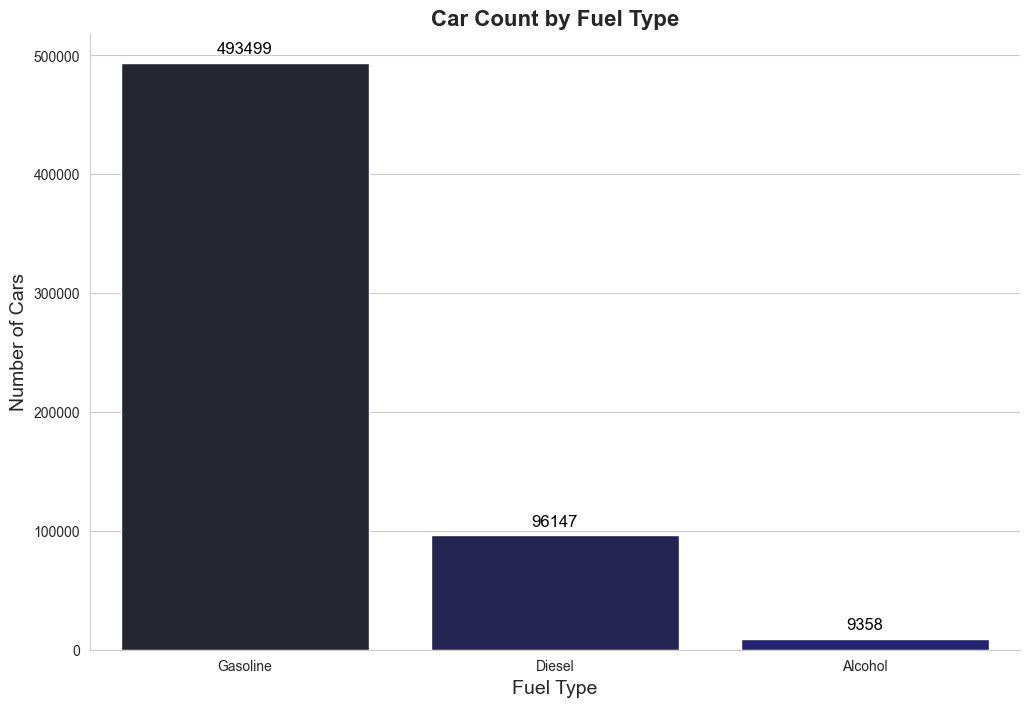

In [466]:
# Adjust style and palette
sns.set_style("whitegrid")
palette = sns.color_palette("dark:Blue", as_cmap=False)  # Choosing a palette

# Set up the figure
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='fuel', palette=palette)

# Title and labels
ax.set_title('Car Count by Fuel Type', fontsize=16, fontweight='bold')
plt.ylabel('Number of Cars', fontsize=14)
plt.xlabel('Fuel Type', fontsize=14)

# Add count above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points', 
                fontsize=12, color='black')

# Remove borders and display the plot
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()



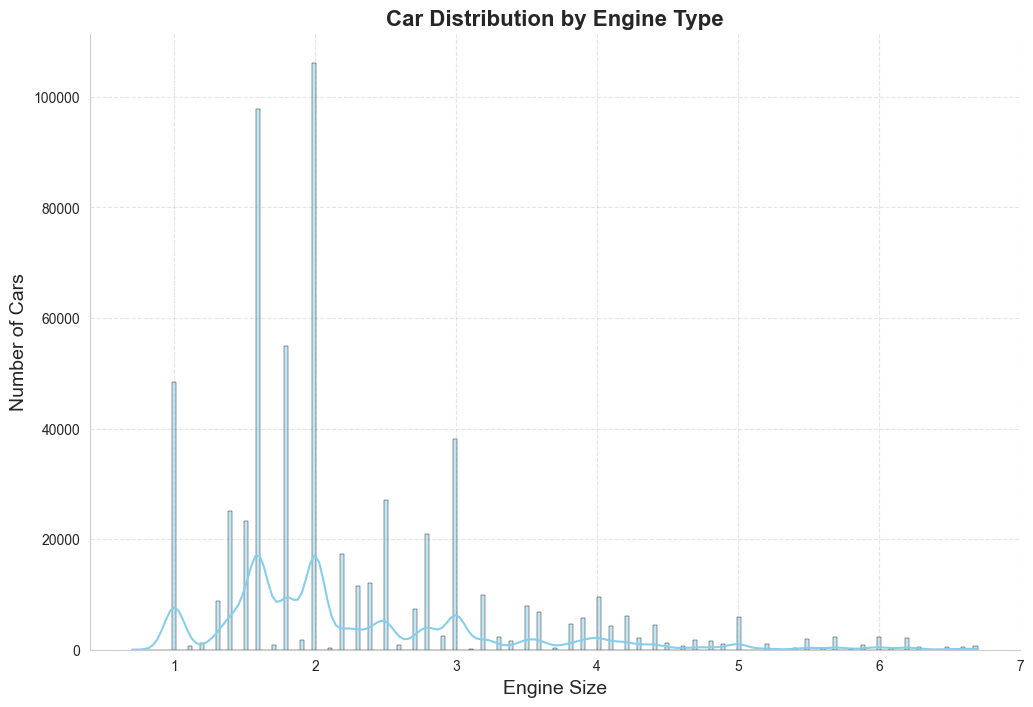

In [468]:
# Adjust style and palette
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Configure the plot with histogram and density
ax = sns.histplot(data=df, x='engine_size', kde=True, color='skyblue', edgecolor='black')

# Title and labels with larger font sizes
ax.set_title('Car Distribution by Engine Type', fontsize=16, fontweight='bold')
plt.ylabel('Number of Cars', fontsize=14)
plt.xlabel('Engine Size', fontsize=14)

# Adjustments to improve visualization
sns.despine(top=True, right=True)
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Finer grid lines

# Display the plot
plt.show()


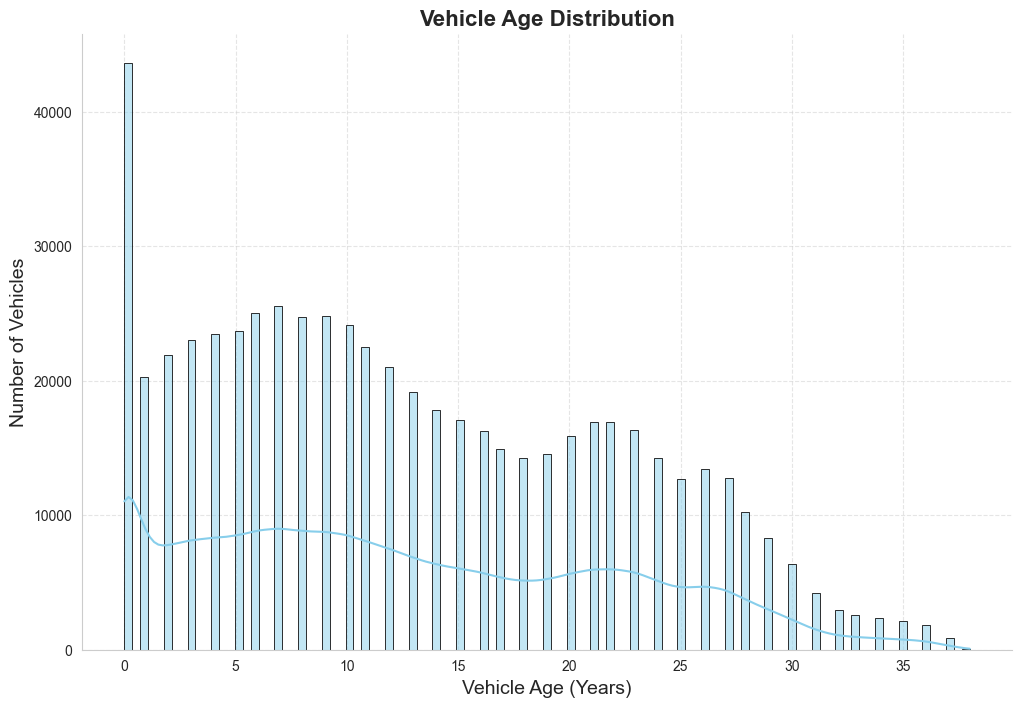

In [469]:
# Improving the plot with a better style and labels
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Plotting histogram with KDE
ax = sns.histplot(data=df, x='age_years', kde=True, color='skyblue', edgecolor='black')

# Title and labels
ax.set_title('Vehicle Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Age (Years)', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)

# Adjusting the grid and making the plot more readable
sns.despine(top=True, right=True)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


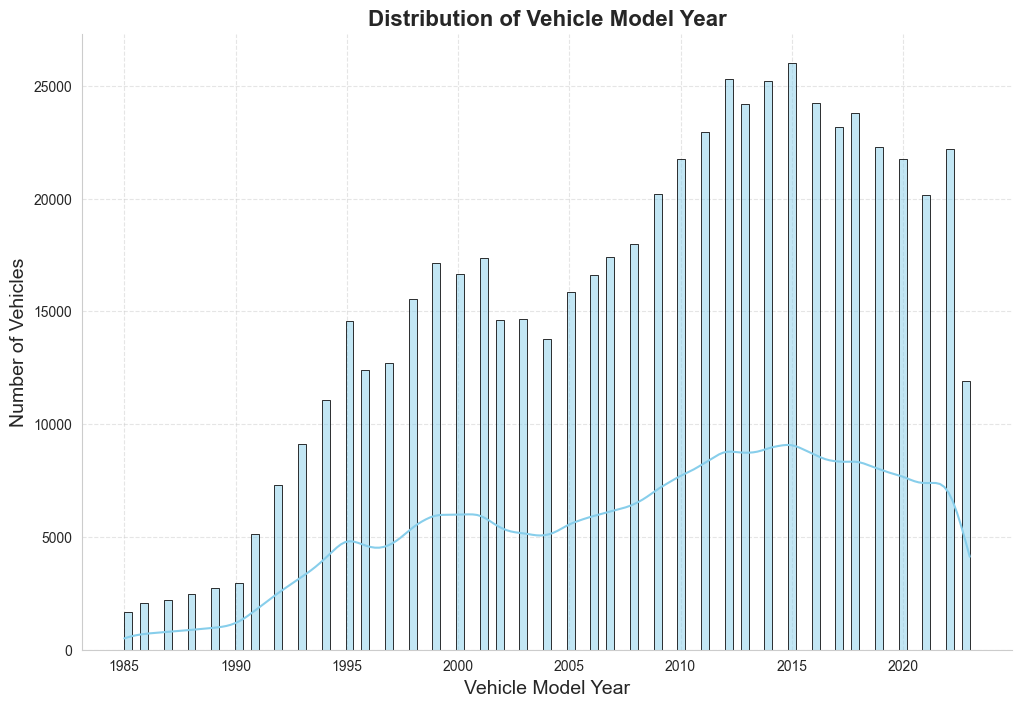

In [470]:
# Improving the plot with a better style and labels
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Plotting histogram with KDE
ax = sns.histplot(data=df, x='year_model', kde=True, color='skyblue', edgecolor='black')

# Title and labels
ax.set_title('Distribution of Vehicle Model Year', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Model Year', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)

# Adjusting the grid and making the plot more readable
sns.despine(top=True, right=True)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


brand
Buggy        3606.833333
Daewoo       7115.414545
Seat         8078.621333
Lada         8534.567692
Isuzu        8760.410909
Plymouth     9332.293333
Mercury      9646.186667
Saturn       9894.760000
Daihatsu    10260.240000
CHANA       13051.240000
Name: avg_price_brl, dtype: float64


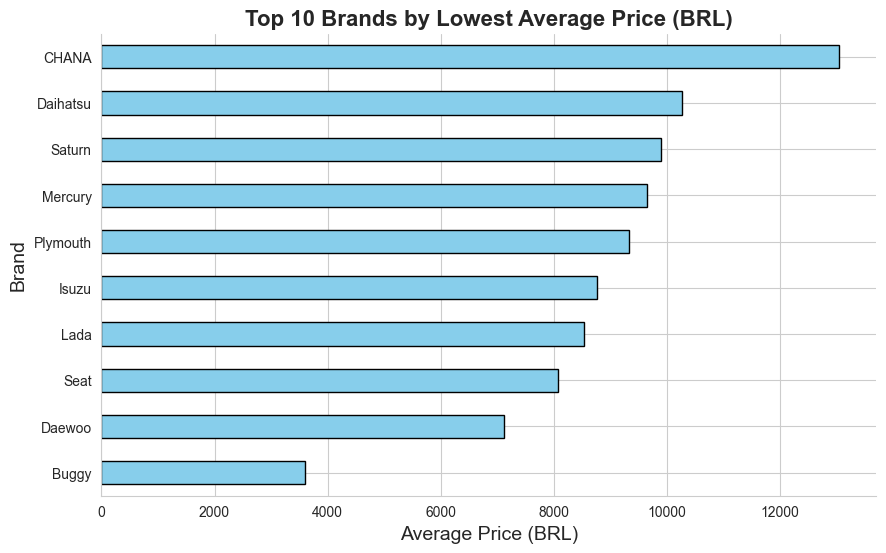

In [471]:
# Check for missing values and ensure proper data types
df = df.dropna(subset=['brand', 'avg_price_brl'])  # Drop rows with missing values in these columns
df['avg_price_brl'] = pd.to_numeric(df['avg_price_brl'], errors='coerce')  # Ensure numeric format

# Calculate the mean price per brand
df_mean = df.groupby('brand')['avg_price_brl'].mean()

# Sort the values and get top 10
df_mean_sorted = df_mean.sort_values(ascending=True)
df_top_10 = df_mean_sorted.head(10)

# Display top 10 brands by average price
print(df_top_10)

# Optional: Visualizing the result
plt.figure(figsize=(10, 6))
df_top_10.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Brands by Lowest Average Price (BRL)', fontsize=16, fontweight='bold')
plt.xlabel('Average Price (BRL)', fontsize=14)
plt.ylabel('Brand', fontsize=14)
sns.despine(top=True, right=True)
plt.show()


brand
Rolls-Royce     3.576759e+06
Mclaren         2.962462e+06
Ferrari         2.688673e+06
ASTON MARTIN    8.510081e+05
Porsche         5.797687e+05
Maserati        4.840010e+05
RAM             4.009195e+05
AM Gen          3.459080e+05
Land Rover      2.624391e+05
Jaguar          2.580398e+05
Name: avg_price_brl, dtype: float64


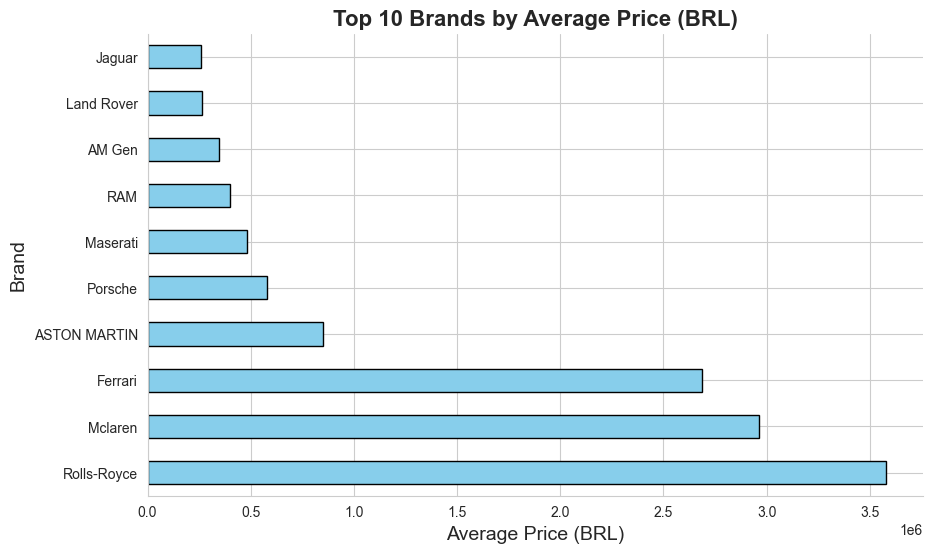

In [472]:
# Check for missing values and ensure proper data types
df = df.dropna(subset=['brand', 'avg_price_brl'])  # Drop rows with missing values in these columns
df['avg_price_brl'] = pd.to_numeric(df['avg_price_brl'], errors='coerce')  # Ensure numeric format

# Calculate the mean price per brand
df_mean = df.groupby('brand')['avg_price_brl'].mean()

# Sort the values and get top 10
df_mean_sorted = df_mean.sort_values(ascending=False)
df_top_10 = df_mean_sorted.head(10)

# Display top 10 brands by average price
print(df_top_10)

# Optional: Visualizing the result
plt.figure(figsize=(10, 6))
df_top_10.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Brands by Average Price (BRL)', fontsize=16, fontweight='bold')
plt.xlabel('Average Price (BRL)', fontsize=14)
plt.ylabel('Brand', fontsize=14)
sns.despine(top=True, right=True)
plt.show()


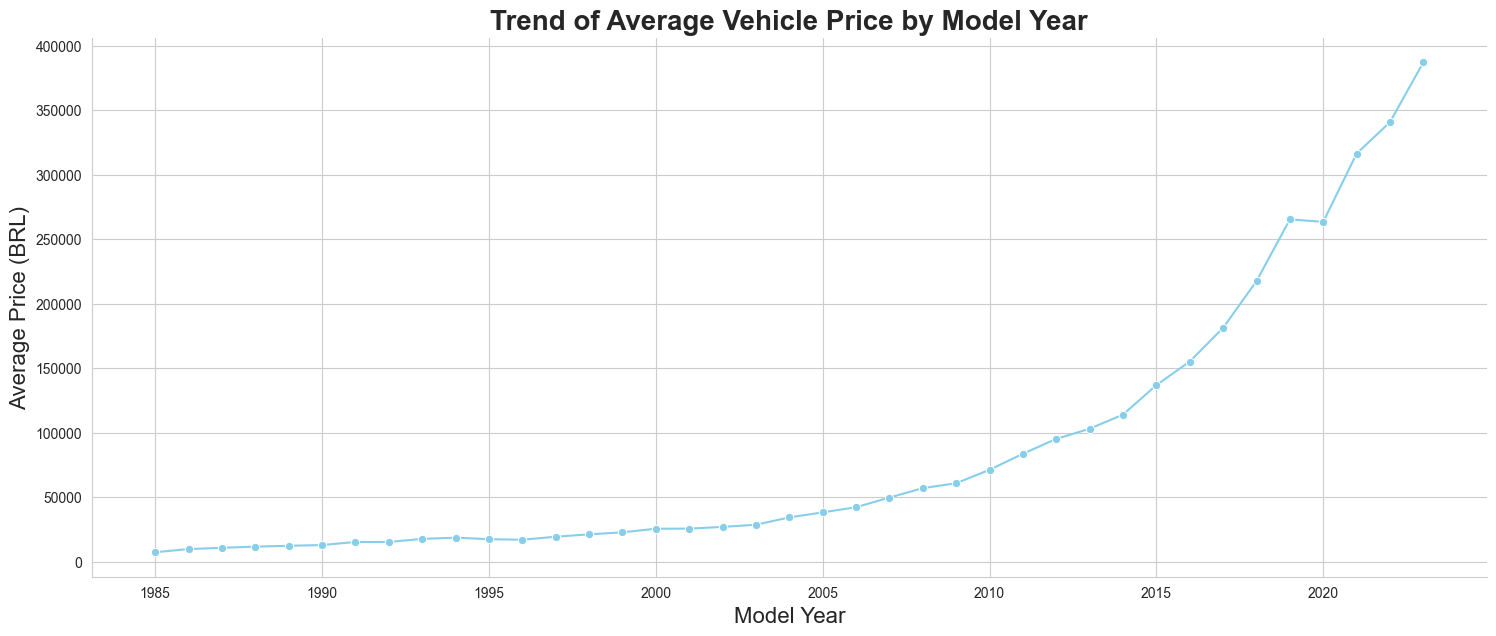

In [473]:
# Line Plot for trend over the years
df_avg_price = df.groupby('year_model')['avg_price_brl'].mean().reset_index()

plt.figure(figsize=(18, 7))
sns.lineplot(x='year_model', y='avg_price_brl', data=df_avg_price, marker='o', color='skyblue')
plt.title('Trend of Average Vehicle Price by Model Year', fontsize=20, fontweight='bold')
plt.xlabel('Model Year', fontsize=16)
plt.ylabel('Average Price (BRL)', fontsize=16)
sns.despine(top=True, right=True)
plt.show()



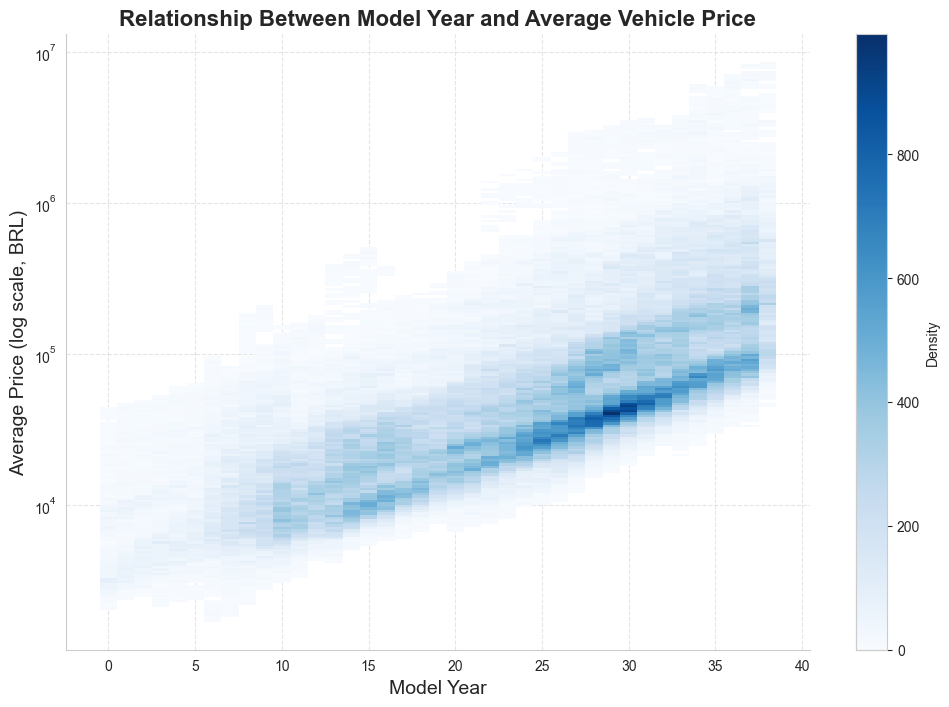

In [499]:
# Enhanced histogram with a blue color gradient and labels
plt.figure(figsize=(12, 8))
sns.histplot(x='year_model', y='avg_price_brl', data=df, discrete=(True, False), log_scale=(False, True), 
             cmap='Blues', cbar=True, cbar_kws={'label': 'Density'})

# Title and labels with consistent style
plt.title('Relationship Between Model Year and Average Vehicle Price', fontsize=16, fontweight='bold')
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Average Price (log scale, BRL)', fontsize=14)

# Adding grid and customizing the color bar
plt.grid(visible=True, linestyle='--', alpha=0.5)
sns.despine(top=True, right=True)

# Show plot
plt.show()


### Encode Categorical Variables

In [475]:
from sklearn.preprocessing import LabelEncoder

# Instantiate a LabelEncoder for each categorical column
le_year_ref = LabelEncoder()
le_month_ref = LabelEncoder()
le_brand = LabelEncoder()
le_model = LabelEncoder()
le_fuel = LabelEncoder()
le_gear = LabelEncoder()
le_year_model = LabelEncoder()

# Apply Label Encoding to the categorical columns
df['year_of_reference'] = le_year_ref.fit_transform(df['year_of_reference'])
df['month_of_reference'] = le_month_ref.fit_transform(df['month_of_reference'])
df['brand'] = le_brand.fit_transform(df['brand'])
df['model'] = le_model.fit_transform(df['model'])
df['fuel'] = le_fuel.fit_transform(df['fuel'])
df['gear'] = le_gear.fit_transform(df['gear'])
df['year_model'] = le_year_model.fit_transform(df['year_model'])



In [479]:
#Visualizing correlations between variables
df.corr()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
year_of_reference,1.000000,-0.045976,-0.001592,-0.001383,-0.002975,-0.004430,-0.000652,0.018037,0.038608,0.043654
month_of_reference,-0.045976,1.000000,-0.000304,-0.000167,-0.000268,-0.001189,-0.000535,0.003464,0.004702,-0.005807
brand,-0.001592,-0.000304,1.000000,0.078169,-0.046728,-0.081033,-0.089128,0.037706,0.002020,-0.037883
model,-0.001383,-0.000167,0.078169,1.000000,-0.078345,0.033632,-0.022812,0.044378,-0.037229,-0.044401
fuel,-0.002975,-0.000268,-0.046728,-0.078345,1.000000,-0.111216,-0.134539,0.047080,0.023868,-0.047832
gear,-0.004430,-0.001189,-0.081033,0.033632,-0.111216,1.000000,-0.011846,-0.337813,-0.080119,0.336902
engine_size,-0.000652,-0.000535,-0.089128,-0.022812,-0.134539,-0.011846,1.000000,-0.123399,0.345861,0.123235
year_model,0.018037,0.003464,0.037706,0.044378,0.047080,-0.337813,-0.123399,1.000000,0.306849,-0.997892
avg_price_brl,0.038608,0.004702,0.002020,-0.037229,0.023868,-0.080119,0.345861,0.306849,1.000000,-0.302638
age_years,0.043654,-0.005807,-0.037883,-0.044401,-0.047832,0.336902,0.123235,-0.997892,-0.302638,1.000000


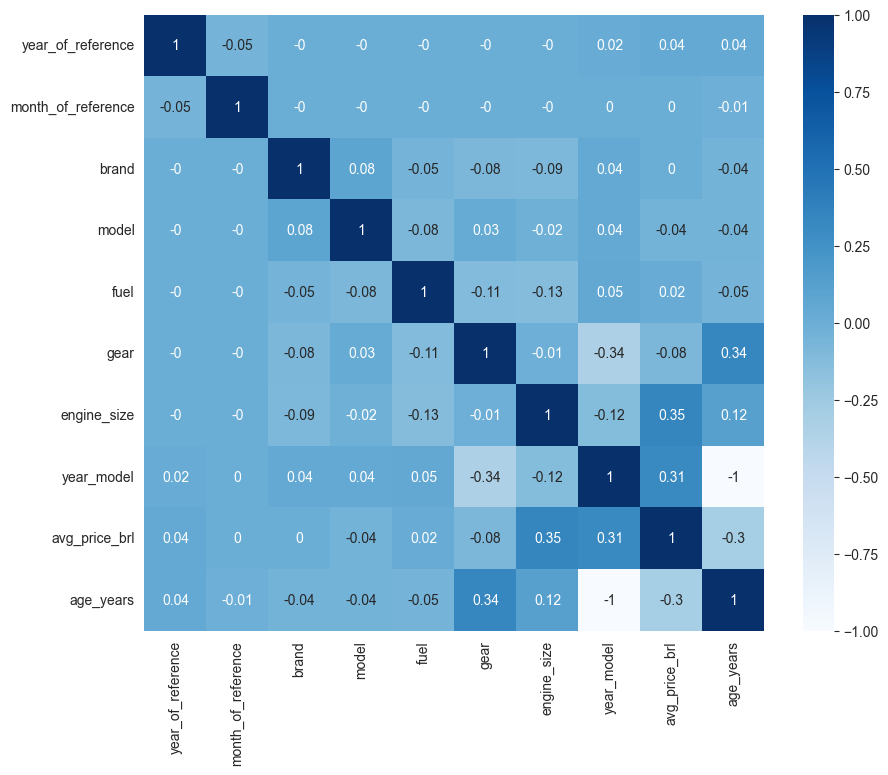

In [480]:
#Visualizing correlations between variables

plt.figure(figsize= (10, 8))
sns.heatmap(df.corr().round(2), cmap= 'Blues', annot= True)
plt.show()

In [481]:
# Sample 10% of the data
df_sample = df.sample(frac=0.1, random_state=42)

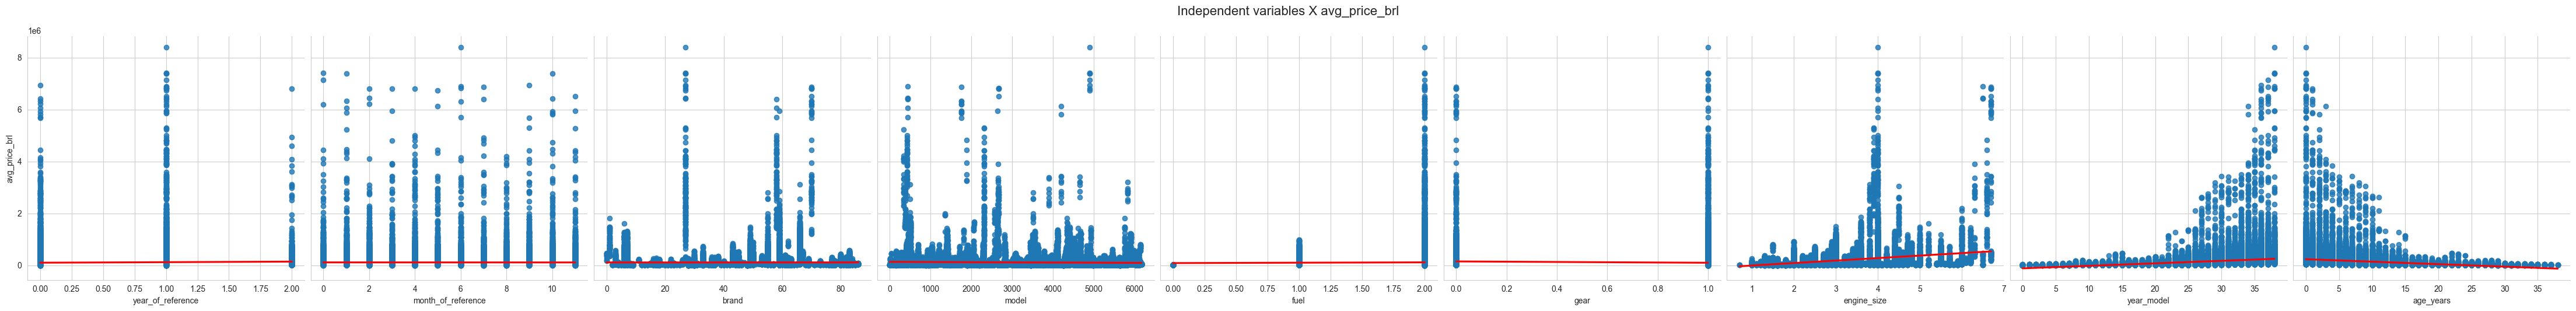

In [482]:
# Visualizing correlations between variables and the target variable "avg_price_brl"

ax = sns.pairplot(
    data= df_sample, y_vars= 'avg_price_brl',
    x_vars= ['year_of_reference',
             'month_of_reference',
        'brand',
        'model',
        'fuel', 
        'gear',
         'engine_size',
          'year_model',
           'age_years'
    ], kind= 'reg', plot_kws= {'line_kws': {'color': 'red'}},
    height= 5
)
ax.fig.suptitle('Independent variables X avg_price_brl', fontsize= 16, y= 1.05)
plt.show()

In [484]:
# Define the target variable (y) and features (X)
x = df.drop(columns=['avg_price_brl'])
y = df['avg_price_brl']



In [485]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [487]:
X_train.shape

(479203, 9)

In [488]:
X_test.shape

(119801, 9)

### Model Comparison and Evaluation
In this section, we will evaluate the performance of three different regression models: Linear Regression, Random Forest, and Decision Tree. By training each model on the training dataset and then making predictions on the test dataset, we will assess their effectiveness using four key evaluation metrics:

Mean Absolute Error (MAE): Measures the average magnitude of errors in predictions, without considering their direction (positive or negative).
Mean Squared Error (MSE): The average of the squared differences between predicted and actual values, penalizing larger errors more than smaller ones.
Root Mean Squared Error (RMSE): The square root of the MSE, which brings the error measure back to the same units as the target variable.
R-squared (R²): Represents the proportion of variance in the target variable that is explained by the model, with values closer to 1 indicating better performance.
The comparison of these models will provide insights into which one best captures the relationship between the features and the target variable, enabling us to make informed decisions about the most suitable model for predicting car prices based on various vehicle characteristics.

In [490]:
# Define a list of models to test
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Initialize an empty dictionary to store results
model_results = {}

# Loop through each model, train, predict, and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
     # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    model_results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }

# Print the model comparison results
for model_name, result in model_results.items():
    print(f"Model: {model_name}")
    print(f"MAE: {result['MAE']:.2f}")
    print(f"MSE: {result['MSE']:.2f}")
    print(f"RMSE: {result['RMSE']:.2f}")
    print(f"R²: {result['R²']:.2f}\n")

Model: Linear Regression
MAE: 100592.63
MSE: 59998542847.75
RMSE: 244946.00
R²: 0.26

Model: Random Forest
MAE: 3794.86
MSE: 236808427.75
RMSE: 15388.58
R²: 1.00

Model: Decision Tree
MAE: 4281.47
MSE: 348247943.25
RMSE: 18661.40
R²: 1.00



Based on these metrics, Random Forest and Decision Tree models perform significantly better than Linear Regression for predicting avg_price_brl. They both have high R² scores, low MAE, and low RMSE values, indicating more accurate and reliable predictions. Linear Regression may be too simple for this data, as indicated by its relatively poor performance across all metrics. For this reason, we will continue using the “RandomForest” model.

### Hyperparameter Tuning with RandomizedSearchCV
In this section, we perform hyperparameter tuning for the Random Forest Regressor model using RandomizedSearchCV. The goal is to optimize key parameters such as the number of trees, maximum depth of the trees, and the number of features considered for splitting at each node. Instead of exhaustively testing all combinations of hyperparameters, we use randomized search to randomly sample a subset of parameter combinations, allowing us to find the best set of hyperparameters in a more computationally efficient manner.

In [491]:
# Define a parameter grid with a focus on key parameters to optimize
param_grid = {
    'n_estimators': [15, 25, 30],            # Number of trees
    'max_depth': [None, 10, 20, 30],            # Depth of trees
    'max_features': ['auto', 'sqrt', 'log2']    # Number of features considered for splitting
}

# Set up RandomizedSearchCV for quicker tuning
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,                  # Number of random parameter settings to try
    scoring='neg_mean_absolute_error',
    cv=3,                       # 3-fold cross-validation
    n_jobs=-1,                  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best MAE Score:", -random_search.best_score_)

# Use the best model from the search
best_rf_model = random_search.best_estimator_

# Evaluate on test data
y_pred = best_rf_model.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))



Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\GS\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\GS\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\GS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\GS\AppData\Roaming\Python\Python311\site-packages\sklea

Best Parameters: {'n_estimators': 15, 'max_features': 'sqrt', 'max_depth': 20}
Best MAE Score: 7310.737658758688
Test MAE: 6548.308444806394
Test R²: 0.994697311854982


In this section, we evaluate the importance of each feature used in the Random Forest Regressor model. Random Forest models provide a way to assess how much each feature contributes to the model’s predictions. This is done by looking at the feature importances, which indicate the relative importance of each feature in the decision-making process of the model.

In [492]:
feature_importances = best_rf_model.feature_importances_
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

year_of_reference: 0.0073
month_of_reference: 0.0040
brand: 0.1754
model: 0.1597
fuel: 0.0184
gear: 0.0206
engine_size: 0.4351
year_model: 0.1145
age_years: 0.0650


Model Evaluation on the Entire Dataset
In this step, we train the Random Forest Regressor model using the entire dataset (X and y). After training the model, we use it to make predictions on the same training data, which allows us to calculate various evaluation metrics. This step helps assess how well the model fits the data.

MAE: 4659.15
MSE: 151821780.30
RMSE: 12321.60
R²: 1.00


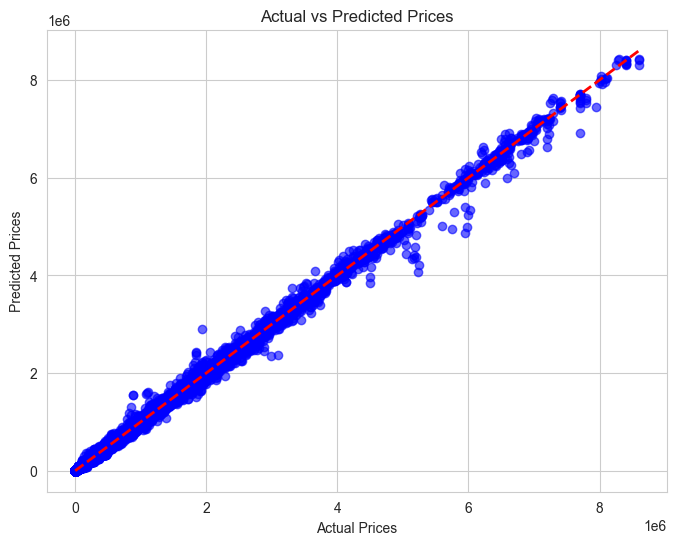

In [494]:
# Train the model on the entire dataset
best_rf_model.fit(X, y)

# Make predictions on the training data
y_pred = best_rf_model.predict(X)

# Calculate the evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Display the results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")



# Plot actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()



### Conclusion

After training the **Random Forest Regressor** on the full dataset and evaluating its performance, we obtained the following metrics:

- **Mean Absolute Error (MAE)**: This value represents the average magnitude of the errors in the predictions. The lower the MAE, the better the model is at predicting the actual prices.
- **Mean Squared Error (MSE)**: While MSE penalizes larger errors more heavily than MAE, it provides a sense of how far off predictions are from actual values on average. A lower MSE indicates better overall performance.
- **Root Mean Squared Error (RMSE)**: This metric, derived from MSE, gives us an error estimate in the same units as the target variable, which helps us interpret the magnitude of the errors more easily.
- **R² (Coefficient of Determination)**: An R² close to 1 indicates that the model is able to explain most of the variance in the target variable. A high R² suggests that the model has a good fit to the data.

The **Random Forest Regressor** performed well with low error rates and a high R², indicating that the model can reliably predict car prices based on the features provided. However, to ensure the model's generalizability, future work could include testing on additional datasets or fine-tuning the model further to improve its performance even more.

In conclusion, this model provides a solid foundation for predicting car prices, and with potential improvements, it could be used in real-world applications, such as estimating insurance costs based on vehicle characteristics.
